In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pwd

u'/Users/dansandiford/Documents/programming/earthsci_code/python/uw-bits/tosi/parallel_version'

## Comparison of different reference viscisity)

In [11]:
case = 4

uwSerial= np.genfromtxt('../old_version/results/uw_results_case' + str(case)+  '.dat', skip_header=0, skip_footer=1)
fenics = np.loadtxt('./FenicsOutput/results_case' + str(case)+  '.dat')
uwPar = np.genfromtxt('./TosiOutput/results_case' + str(case)+  '.dat', skip_header=0, skip_footer=1)
uwRescale = np.genfromtxt('./extensions/rescaled/TosiOutput/results_case' + str(case)+  '.dat', skip_header=0, skip_footer=1)
uwHighRa = np.genfromtxt('./extensions/higher_rayleigh_number/TosiOutput/results_case' + str(case)+  '.dat', skip_header=0, skip_footer=1)
uwSwarmInt = np.genfromtxt('./extensions/stickyair/swarm_integration/TosiOutput/results_case' + str(case)+  '.dat', skip_header=0, skip_footer=1)
uwSticky = np.genfromtxt('./extensions/stickyair/TosiOutput/results_case' + str(case)+  '.dat', skip_header=0, skip_footer=1)




In [12]:
uwPar.shape

(3948, 11)

In [13]:
#realtime, Viscdis, float(Nu0glob), float(Nu1glob), Avg_temp, Rms,
#Rmsurfglob,Max_vx_surf,Gravwork, etamax, etamin, Viscdisair

In [14]:
ETA_T = 1e5
newvisc= math.exp(math.log(ETA_T)*0.64)

In [15]:
#Little test for cleaning up the max_vx_surf metric
#test = uwPar[:,col]
#test[np.isnan(test)]=0
#test[test[:] > 1e5]=0
#test.max()

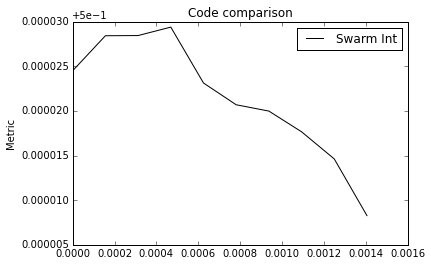

In [18]:
col = 4

#plt.plot(uwSerial[:,0], uwSerial[:,col], c='r',label="UW - Serial.")
#plt.plot(uwPar[:,0], uwPar[:,col], c='b',label="UW - Parallel.")
#plt.plot(uwRescale[:,0], uwRescale[:,col], c='r',label="UW - Rescale.")
#plt.plot(uwHighRa[:,0], uwHighRa[:,col], c='k',label="UW - High Ra..")
plt.plot(uwSwarmInt[:10,0], uwSwarmInt[:10,col], c='k',label="Swarm Int")
#plt.plot(fenics[1:-1,0], fenics[1:-1,col], c='k',label="fenics")
#plt.plot(uwSticky[:,0], uwSticky[:,col], c='g',label="Sticky air")



plt.legend()
plt.title('Code comparison')
plt.ylabel('Metric')

In [32]:
out =[]
for col in range(uwPar.shape[1]):
    out.append(mean(uwPar[-100:, col]))

In [33]:
print(out)

[0.14856331835305997, 593.44734948322991, -6.4074474934136996, -6.423836764581301, 0.52441694351277013, 81.960253459561002, 77.951947091058997, nan, 5.9430980102478994, 1.6469302332853002, 0.00019167972715570001]


##Comparison with Fenics results

Output data format:

(t, viscdis, Nu0, Nu1, temp_int, rms_vel, rms_surf_vel, max_surf_vel, work))

In [2]:
CASE = 2.

In [3]:
uwres = np.loadtxt('./TosiOutput/results_case2.dat')
#uwres = np.loadtxt('./TosiOutput/results_case2.dat')
fres = np.loadtxt('./FenicsOutput/results_case2.dat')




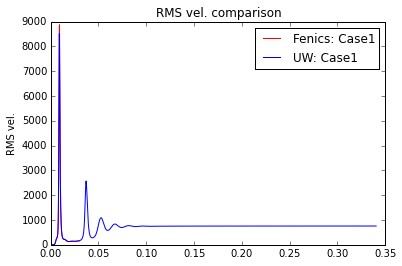

In [4]:
#plot RMS values, 


plt.plot(fres[:,0], fres[:,1], c='r',label="Fenics: Case1")
plt.plot(uwres[:,0], uwres[:,1], c='b',label="UW: Case1")



plt.legend()
plt.title('RMS vel. comparison')
plt.ylabel('RMS vel.')

In [14]:
fres = np.loadtxt('./results/results_case2.dat')

uwres = np.loadtxt('./results/uw_results_case2.dat')




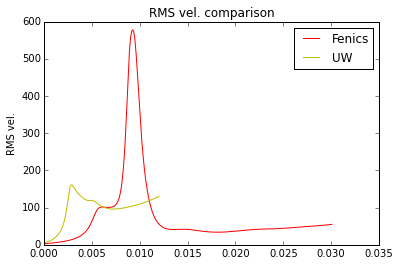

In [7]:
#plot RMS values, 


plt.plot(fres[:,0], fres[:,5], c='r',label="Fenics")
plt.plot(uwres[:,0], uwres[:,5], c='y',label="UW")



plt.legend()
plt.title('RMS vel. comparison')
plt.ylabel('RMS vel.')

* The resolution is quite important in terms of how well the Underworld and Fenics results match.

##Work against gravity vs. visous dissipation

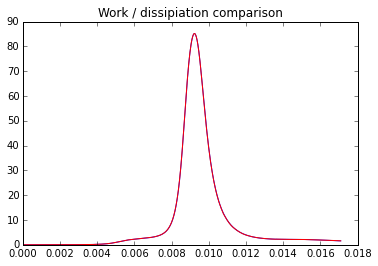

In [9]:
#Plot work against gravity and viscous dissipation (should be equal)
RA= 1e2        # Rayleigh number (Top boundary)
plt.plot(uwres[:,0], uwres[:,1]/RA, c='b')
plt.plot(uwres[:,0], uwres[:,8], c='r')
plt.title('Work / dissipiation comparison')

##Notes

The differences between top and bottom Nusselt numbers obtained with YACC range from 􏰃3% for Case 1 to 􏰃0:5% for Case 4 and are in line with those obtained with the four finite element codes, none of which predicts the two quantities to perfectly match. This dis- crepancy could be indicative of a slight imbalance in the energy conservation (note that for the above codes, $Nu_{top}$ is systematically higher than $Nu_{bot}$). 

##Resolution test

For Cases 1 and 2, all participants conducted a series of resolution tests on more and more refined grids to assess the convergence properties of the various codes using a temperature-dependent linear rheology (Case 1) and a temperature and strain rate-dependent nonlinear rheology (Case 2). For each code, all diagnostic quantities calculated on meshes of increasing size, as well as their extrapolated values are reported in Tables S2–S13 of supporting information, while in Figure 5 we show the steady state solution for the RMS velocity from all codes as a function of the number N of grid points or elements employed in one direction (all codes employed the same number of grid points in both horizontal and vertical directions).

##Case 5a: Periodic Solutions

In Case 5a, the yield stress is sufficiently large ( inline image) to cause the system to reach a stable periodic regime characterized by one single period. Figure 6 illustrates the time series of the mean temperature, RMS velocity, and surface Nusselt number over four complete cycles plotted after the system reached a strictly periodic regime; the figure also shows a phase portrait of the surface Nusselt number as a function of the RMS velocity describing the path toward the stable cycle.

In [5]:
#uwres5 = np.loadtxt('uw_results_case2.dat')
uwres5 = np.loadtxt('./results/uw_results_case_periodic4.0.dat')

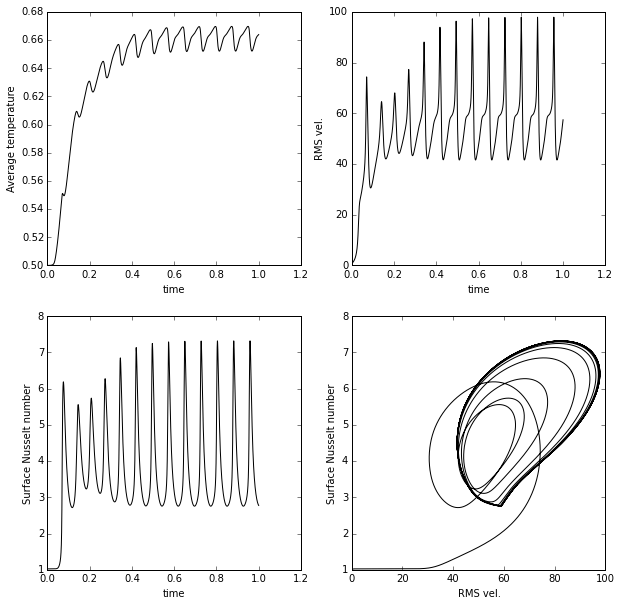

In [6]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(221)   #top left
plt.plot(uwres5[:,0], uwres5[:,4], c='k')
plt.ylabel('Average temperature')
plt.xlabel('time')
fig.add_subplot(222)   #top right
plt.plot(uwres5[:,0], uwres5[:,5], c='k')
plt.ylabel('RMS vel.')
plt.xlabel('time')
fig.add_subplot(223)   #bottom left
plt.plot(uwres5[:,0], uwres5[:,3], c='k')
plt.ylabel('Surface Nusselt number')
plt.xlabel('time')
fig.add_subplot(224)   #bottom right 
plt.plot(uwres5[:,5], uwres5[:,3], c='k')
plt.ylabel('Surface Nusselt number')
plt.xlabel('RMS vel.')
plt.show()

* Note that Figure 6 caption says "Time series for Case 5a... __after reaching a strictly periodic regime__"...

##Other figures...

In [36]:
!h5dump -A ./TosiOutput/files/temperatureField_2_10.hdf5

HDF5 "./TosiOutput/files/temperatureField_2_10.hdf5" {
GROUP "/" {
   DATASET "data" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 1681, 1 ) / ( 1681, 1 ) }
   }
}
}


In [1]:
import h5py
import underworld as uw
from underworld import function as fn

In [3]:
Xres, Yres = 40, 40
dim = 2          # number of spatial dimensions

In [4]:
elementMesh = uw.mesh.FeMesh_Cartesian( elementType=("Q1/dQ0"), 
                                         elementRes=(Xres, Yres), 
                                           minCoord=(0.,0.), 
                                           maxCoord=(1.,1.)  )
linearMesh   = elementMesh
constantMesh = elementMesh.subMesh 

In [5]:
#Grab depth function (assumes regular mesh)
coordinate = fn.input()
sidewall = linearMesh.specialSets["MinI_VertexSet"]
depth = coordinate.evaluate(sidewall)[:,1]

In [6]:
tempfile = h5py.File('./extensions/stickyair/TosiOutput/files/temperatureField_4_3800.hdf5', libver='latest')
#rmsfile = h5py.File('./TosiOutput/files/rmsField_4_1000.hdf5', libver='latest')
#viscfile = h5py.File('./TosiOutput/files/viscField_4_1000.hdf5', libver='latest')
#stressfile = h5py.File('./TosiOutput/files/stressField_4_1000.hdf5', libver='latest')




In [7]:
#tempdata = h5file["data"][:]
tempdata = np.reshape(tempfile["data"][:], (linearMesh.elementRes[0]+1,linearMesh.elementRes[1]+1))
#rmsdata = np.reshape(rmsfile["data"][:], (linearMesh.elementRes[0]+1,linearMesh.elementRes[1]+1))
#viscdata = np.reshape(viscfile["data"][:], (linearMesh.elementRes[0]+1,linearMesh.elementRes[1]+1))
#stressdata = np.reshape(stressfile["data"][:], (linearMesh.elementRes[0]+1,linearMesh.elementRes[1]+1))

153.6

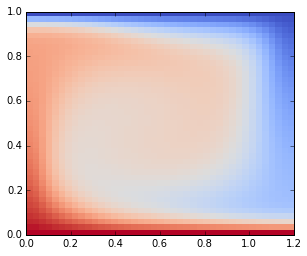

In [9]:
plt.imshow(np.flipud(tempdata), interpolation='nearest', cmap='coolwarm', extent=[0., 1., 0., 1.])


In [29]:
#Setup data arrays (numpy arrays) depth averaged Temp, Viscosity, RMS vel., Stress 

#Temp
#tempdata = np.reshape(temperatureField.data[:,0], (linearMesh.elementRes[0]+1,linearMesh.elementRes[1]+1))
tempmean = tempdata.mean(axis = 1)

#Visc

#vfield = viscosityFn2.evaluate(linearMesh)
#viscdata = np.reshape(vfield[:,0], (linearMesh.elementRes[0]+1,linearMesh.elementRes[1]+1))
viscmean = viscdata.mean(axis = 1)

#Rms
#rms = np.sqrt(np.square(velocityField.data[:,0]) + np.square(velocityField.data[:,1]))
#rmsdata = np.reshape(rms, (linearMesh.elementRes[0]+1,linearMesh.elementRes[1]+1))
rmsmean = rmsdata.mean(axis = 1)

#Stress
#rost = fn.tensor.second_invariant( 
#                    fn.tensor.symmetric( 
#                        velocityField.gradientFn ))
#rostfield = rost.evaluate(linearMesh)
#stressinv = 2*vfield[:]*rostfield[:]
#stressdata = np.reshape(stressinv[:,0], (linearMesh.elementRes[0]+1,linearMesh.elementRes[1]+1))
stressmean = stressdata.mean(axis=1)

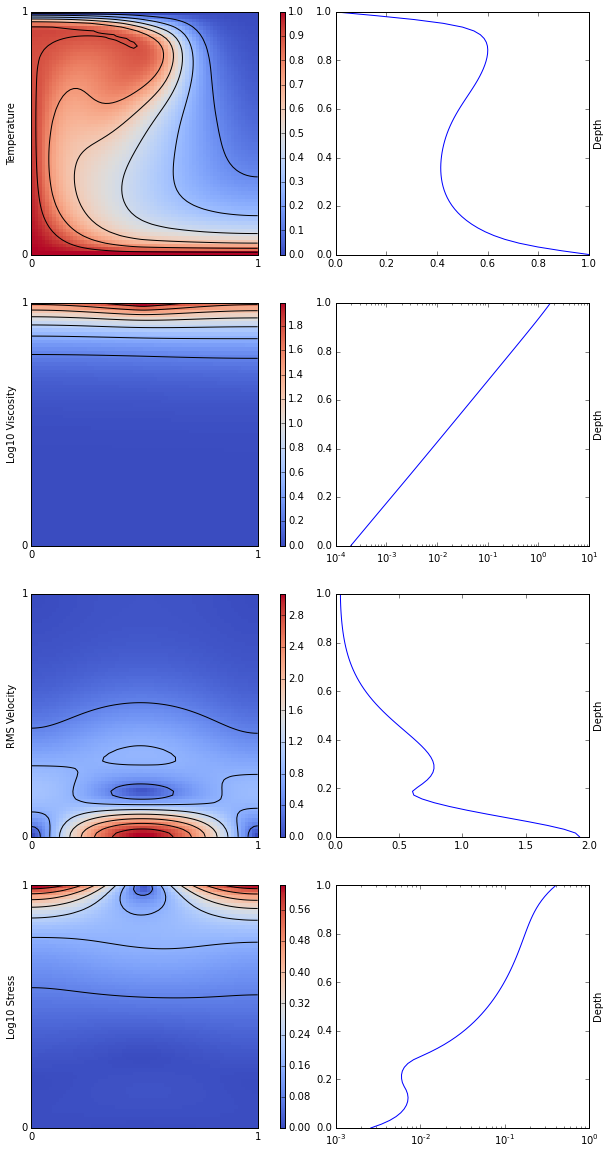

In [30]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = pyplot.figure(figsize=(10,20))


ax = fig.add_subplot(421)
ax.set_xticks([0.,1.])
ax.set_yticks([0.,1.])
ax.set_ylabel('Temperature')
i = ax.imshow(np.flipud(tempdata), interpolation='nearest', cmap='coolwarm', extent=[0., 1., 0., 1.], aspect='auto')
ax.contour(tempdata, extent=[0., 1., 0., 1.], colors = 'k')
divider = make_axes_locatable(pyplot.gca())
cax = divider.append_axes("right", "2%", pad="10%")
pyplot.colorbar(i, cax=cax)



ax = fig.add_subplot(422)
ax.set_ylabel('Depth')
ax.yaxis.set_label_position("right")
pyplot.plot(tempmean[::-1],depth[::-1])

ax = fig.add_subplot(423)
ax.set_xticks([0.,1.])
ax.set_yticks([0.,1.])
i = ax.imshow(np.flipud(viscdata), interpolation='nearest', cmap='coolwarm', extent=[0., 1., 0., 1.], aspect='auto')
ax.set_ylabel('Log10 Viscosity')
ax.contour(viscdata, extent=[0., 1., 0., 1.], colors = 'k')
divider = make_axes_locatable(pyplot.gca())
cax = divider.append_axes("right", "2%", pad="10%")
pyplot.colorbar(i, cax=cax)


ax = fig.add_subplot(424)
ax.set_ylabel('Depth')
ax.yaxis.set_label_position("right")
pyplot.plot(viscmean[::-1],depth[::-1])
ax.set_xscale('log')

ax = fig.add_subplot(425)
ax.set_xticks([0.,1.])
ax.set_yticks([0.,1.])
i = ax.imshow(np.flipud(rmsdata), interpolation='nearest', cmap='coolwarm', extent=[0., 1., 0., 1.], aspect='auto')
ax.set_ylabel('RMS Velocity')
ax.contour(rmsdata, extent=[0., 1., 0., 1.], colors = 'k')
divider = make_axes_locatable(pyplot.gca())
cax = divider.append_axes("right", "2%", pad="10%")
pyplot.colorbar(i, cax=cax)

ax = fig.add_subplot(426)
ax.set_ylabel('Depth')
ax.yaxis.set_label_position("right")
pyplot.plot(rmsmean[::-1],depth[::-1])

ax = fig.add_subplot(427)
ax.set_xticks([0.,1.])
ax.set_yticks([0.,1.])
i = ax.imshow(np.flipud(stressdata), interpolation='nearest', cmap='coolwarm', extent=[0., 1., 0., 1.], aspect='auto')
ax.set_ylabel('Log10 Stress')
ax.contour(stressdata, extent=[0., 1., 0., 1.], colors = 'k')
divider = make_axes_locatable(pyplot.gca())
cax = divider.append_axes("right", "2%", pad="10%")
pyplot.colorbar(i, cax=cax)

ax = fig.add_subplot(428)
ax.set_ylabel('Depth')
ax.yaxis.set_label_position("right")
pyplot.plot(stressmean[::-1],depth[::-1])
ax.set_xscale('log')


fig.savefig("tosi.png")

Figure 1. Steady state snapshots of temperature, viscosity, RMS velocity, second invariant of the stress tensor, and (right column) corresponding laterally averaged profiles for Case 1 obtained with the code Underworld. 